# Alligators Don't Apologize - Exploratory Data Analysis

In [34]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

## Load the datasets

### 1) CMU Dataset

In [36]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
CMU_movie_metadata.head(10)

# Load the character metadata
CMU_char_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/character.metadata.tsv', sep='\t', header=None)
CMU_char_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_release_date', 'character_name', 'actor_DOB', 'actor_gender', 'actor_height_meters', 'actor_ethnicity', 'actor_name', 'actor_age_at_movie_release', 'freebase_character_actor_map_ID', 'freebase_character_ID', 'freebase_actor_ID']

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

#######

# Include the other parts of the dataset if needed

######


### 2) GVD Dataset

In [37]:
# Load the GVD dataset
GVD_data = pd.read_csv(raw_data_folder+'GVD_Dataset/2023_gvdDatabase_1_0_country.csv')

### 3) Kaggle Movies Dataset

In [38]:
# Load the movies metadata
Kaggle_movies_metadata = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/movies_metadata.csv')

# Load the credits
Kaggle_credits = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/credits.csv')

# Load the keywords data
Kaggle_keywords = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/keywords.csv')

# Load the ratings
Kaggle_ratings = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/ratings.csv')

# Load the links
Kaggle_links = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/links.csv')

/var/folders/8z/vm21_w1s46v5nvgv_mq9wlrh0000gn/T/ipykernel_98616/3945269963.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  Kaggle_movies_metadata = pd.read_csv(raw_data_folder+'Kaggle_Movies_Dataset/movies_metadata.csv')


### 4) Movies Body Count Dataset

In [65]:
# Load the movies body count data
movies_body_count = pd.read_csv(raw_data_folder+'Movies_Body_Count/movie_body_count.csv')

## Investigate the data

In [43]:
# Enable full display of the strings in the dataset
pd.set_option('display.max_colwidth', 20)

## 1) Investigate the CMU Dataset

### Identify the most violent movies (physical violence) based on the plot summaries: (Emma's code)

In [41]:
violent_words_list = [
    "assassinate", "assassination", "assault", "attack", "behead", "beheading",
    "beat", "beating", "bludgeon", "blood", "bloody", "bomb", "bombing", "box",
    "boxing", "brutalize", "bullet", "butcher", "choke", "combat", "corpse", "crush",
    "decapitate", "decapitation", "dismember", "dismemberment", "enemy", "execute",
    "execution", "explode", "explosion", "fist fight", "gore", "gory", "gun", "gun down",
    "gunshot", "hack", "hang", "hit", "homicide", "impale", "injure", "injury",
    "kill", "killing", "knife", "knifing", "maim", "manslaughter", "massacre",
    "molest", "murder", "mutilate", "mutilation", "punch", "rape", "ravage", 
    "rip", "savage", "sever", "shoot", "shooting", "slash", "slay", "slaying",
    "slaughter", "slit", "smash", "stab", "stabbing", "strangle", "strangulation",
    "suffocate", "suffocation", "throttle", "torture", "trample", "wound",
    "artillery", "bombardment", "shelling", "ambush", "grenade", "mortar",
    "bayonet", "napalm", "landmine", "shrapnel"
]


In [44]:
# Define the pattern for the parsing
pattern = r'\b(?:' + '|'.join(violent_words_list) + r')\b'

# Lower case the plot_summaries
CMU_plot_summary['plot_summary'] = CMU_plot_summary['plot_summary'].str.lower()

# Count the number of violent words from the violent_words_list in the plot_summary for each movie
CMU_plot_summary['total_vio_words'] = CMU_plot_summary['plot_summary'].str.count(pattern)

# Count the number of words in each plot summary
CMU_plot_summary['n_words_summary'] = CMU_plot_summary['plot_summary'].str.split().str.len()

# Calculate the "violent words density" by dividing the violent words count by the number of words in the plot summary for each movie
CMU_plot_summary['total_vio_words_density'] = CMU_plot_summary['total_vio_words'] / CMU_plot_summary['n_words_summary']

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,total_vio_words,n_words_summary,total_vio_words_density
0,23890098,"shlykov, a hard-...",0,25,0.000000
1,31186339,the nation of pa...,5,778,0.006427
2,20663735,poovalli inducho...,3,496,0.006048
3,2231378,the lemon drop k...,0,849,0.000000
4,595909,seventh-day adve...,1,397,0.002519
...,...,...,...,...,...
42298,34808485,the story is abo...,0,40,0.000000
42299,1096473,in 1928 hollywoo...,0,524,0.000000
42300,35102018,american luthier...,0,160,0.000000
42301,8628195,abdur rehman kha...,0,230,0.000000


In [45]:
# Add the movie titles and the genres
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name', 'movie_genres']], on='wikipedia_movie_ID', how='left')

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,total_vio_words,n_words_summary,total_vio_words_density,movie_name,movie_genres
0,23890098,"shlykov, a hard-...",0,25,0.000000,Taxi Blues,"{""/m/07s9rl0"": ""..."
1,31186339,the nation of pa...,5,778,0.006427,The Hunger Games,"{""/m/03btsm8"": ""..."
2,20663735,poovalli inducho...,3,496,0.006048,Narasimham,"{""/m/04t36"": ""Mu..."
3,2231378,the lemon drop k...,0,849,0.000000,The Lemon Drop Kid,"{""/m/06qm3"": ""Sc..."
4,595909,seventh-day adve...,1,397,0.002519,A Cry in the Dark,"{""/m/0lsxr"": ""Cr..."
...,...,...,...,...,...,...,...
42298,34808485,the story is abo...,0,40,0.000000,Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""C..."
42299,1096473,in 1928 hollywoo...,0,524,0.000000,The Last Command,"{""/m/06ppq"": ""Si..."
42300,35102018,american luthier...,0,160,0.000000,Randy Parsons: A...,"{""/m/02hmvc"": ""S..."
42301,8628195,abdur rehman kha...,0,230,0.000000,Kabuliwala,"{""/m/07s9rl0"": ""..."


In [46]:
# sort the movies according to their violent words density in the plot summary
CMU_movies_sorted = CMU_plot_summary.sort_values(by='total_vio_words_density', ascending=False)
display(CMU_movies_sorted)

,wikipedia_movie_ID,plot_summary,total_vio_words,n_words_summary,total_vio_words_density,movie_name,movie_genres
35435,19042389,two dance partne...,2,18,0.111111,Accused,"{""/m/02n4kr"": ""M..."
38529,30663765,the film is abou...,1,9,0.111111,Manasina Maathu,"{""/m/02l7c8"": ""R..."
37873,113454,the film tells t...,3,27,0.111111,Prizzi's Honor,"{""/m/06cvj"": ""Ro..."
37531,12073433,the film dramati...,2,19,0.105263,The Beginning or...,"{""/m/02l7c8"": ""R..."
16735,23922445,a young couple e...,2,19,0.105263,Assault! Jack th...,"{""/m/04k2v3"": ""P..."
...,...,...,...,...,...,...,...
25749,12071277,seemingly conten...,0,86,0.000000,Beyza'nın Kadınları,"{""/m/0lsxr"": ""Cr..."
11229,12781333,"catania, women a...",0,50,0.000000,Il bell'Antonio,"{""/m/07s9rl0"": ""..."
25747,8138535,"corie , a free s...",0,709,0.000000,Barefoot in the ...,"{""/m/06cvj"": ""Ro..."
11230,33188259,director kôji sh...,0,304,0.000000,Shirome,"{""/m/0gw5n2f"": ""..."


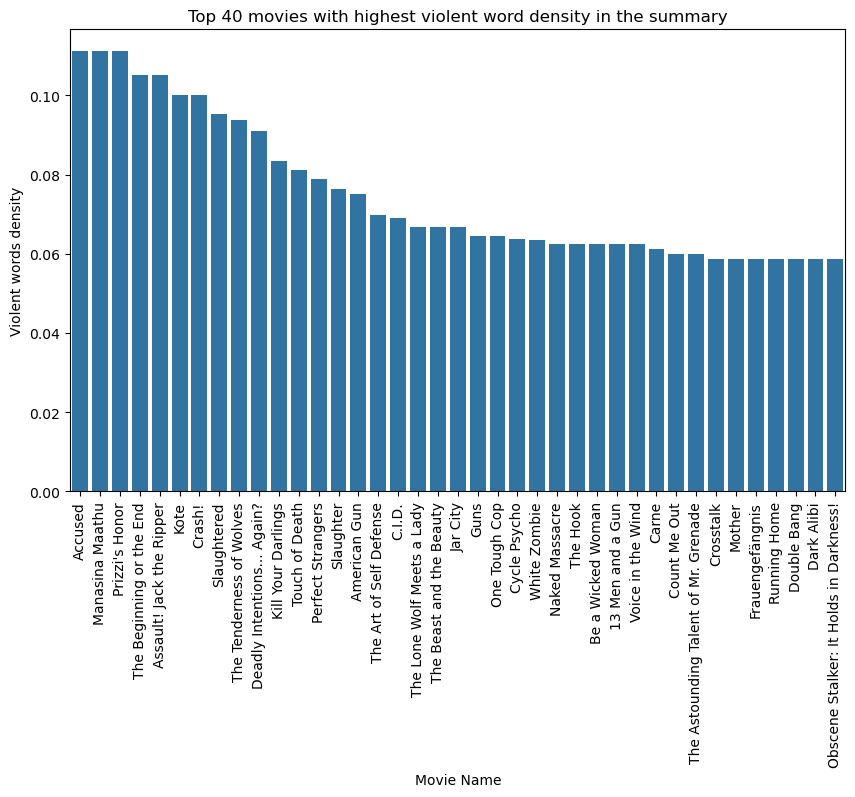

In [47]:
# Plot the results

top_movies = CMU_movies_sorted.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with highest violent word density in the summary")
plt.xticks(rotation=90)
plt.show()

## 2) Investigate the GVD Dataset

In [58]:
GVD_data[GVD_data["country_code"]=='USA']

,year,country_code,country_name,country_region,country_subregion,population,indicator,mechanism,count,rate,count_population,source_name,source_url,entry_comment
94092,2004,USA,United States,Americas,Northern America,Female,Homicide intenti...,All,3551,2.40,148127314,UN Office On Dru...,https://dataunod...,Data collected a...
94093,2004,USA,United States,Americas,Northern America,Male,Homicide intenti...,All,12596,8.73,144227349,UN Office On Dru...,https://dataunod...,Data collected a...
94094,2004,USA,United States,Americas,Northern America,Total,Homicide intenti...,All,16147,5.52,292354663,National Police,https://www.smal...,Data collected a...
94095,2005,USA,United States,Americas,Northern America,Female,Homicide intenti...,All,3559,2.38,149425428,UN Office On Dru...,https://dataunod...,Data collected a...
94096,2005,USA,United States,Americas,Northern America,Male,Homicide intenti...,All,13180,9.05,145568081,UN Office On Dru...,https://dataunod...,Data collected a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94519,2020,USA,United States,Americas,Northern America,Male,Violent death,Firearm,18898,11.54,163786016,NaN,NaN,Data estimated i...
94520,2020,USA,United States,Americas,Northern America,Total,Violent death,Firearm,22298,6.74,331002647,NaN,NaN,Data estimated i...
94521,2021,USA,United States,Americas,Northern America,Female,Violent death,Firearm,3463,2.04,170055983,NaN,NaN,Data estimated i...
94522,2021,USA,United States,Americas,Northern America,Male,Violent death,Firearm,19239,11.52,166941641,NaN,NaN,Data estimated i...


## 3) Investigate the Kaggle Dataset

First, we check the entirety of the columns:

In [48]:
Kaggle_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Check specifically all column values for one entry (movie: From Dusk Till Dawn) to inspect the datatypes of each column:

In [60]:
Kaggle_movies_metadata[Kaggle_movies_metadata['id']=='755']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
69,False,"{'id': 10924, 'n...",19000000,"[{'id': 27, 'nam...",http://www.miram...,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and h...,...,1996-01-19,25836616.0,108.0,[{'iso_639_1': '...,Released,One night is all...,From Dusk Till Dawn,False,6.9,1644.0


Findings: Some of the columns are a stringified JSON object. This needs to be treated specifically for successful parsing.

Below is a way to first transform the JSON object "genre" into a string and then parsing for a specific word (in this case: Violence).

In [61]:
filtered_Kaggle_metadata = Kaggle_movies_metadata[Kaggle_movies_metadata['genres'].str.contains(r'\bCrime\b', na=False)]
filtered_Kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5,False,NaN,60000000,"[{'id': 28, 'nam...",NaN,949,tt0113277,en,Heat,Obsessive master...,...,1995-12-15,187436818.0,170.0,[{'iso_639_1': '...,Released,A Los Angeles Cr...,Heat,False,7.7,1886.0
15,False,NaN,52000000,"[{'id': 18, 'nam...",NaN,524,tt0112641,en,Casino,The life of the ...,...,1995-11-22,116112375.0,178.0,[{'iso_639_1': '...,Released,No one stays at ...,Casino,False,7.8,1343.0
17,False,NaN,4000000,"[{'id': 80, 'nam...",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bel...,...,1995-12-09,4300000.0,98.0,[{'iso_639_1': '...,Released,Twelve outrageou...,Four Rooms,False,6.5,539.0
18,False,"{'id': 3167, 'na...",30000000,"[{'id': 80, 'nam...",NaN,9273,tt0112281,en,Ace Ventura: Whe...,Summoned from an...,...,1995-11-10,212385533.0,90.0,[{'iso_639_1': '...,Released,New animals. New...,Ace Ventura: Whe...,False,6.1,1128.0
19,False,NaN,60000000,"[{'id': 28, 'nam...",NaN,11517,tt0113845,en,Money Train,A vengeful New Y...,...,1995-11-21,35431113.0,103.0,[{'iso_639_1': '...,Released,"Get on, or GET O...",Money Train,False,5.4,224.0


We now define a list of violent words which we will use to parse through the keywords dataset in the Kaggle dataset:

In [34]:
# Violence keywords
violence_list = ['Murder','Kill','Assault','Abuse','Fight','War','Attack','Violence','Crime','Hostage','Revenge','Torture','Conflict','Terror']

We now use a pattern to parse through the "keywords" dataset and try to find all entries that contain at least one of the keywords in the violence_list.

In [35]:
# Define the pattern for the parsing
pattern = r'\b(?:' + '|'.join(violence_list) + r')\b'

# Filter the keywords dataframe for entries that contain any of the violence_dict
filtered_Kaggle_keywords = Kaggle_keywords[Kaggle_keywords['keywords'].str.contains(pattern, na=False, case=False)]

filtered_Kaggle_keywords.head()

,id,keywords
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, 'name': 'detective'}, {'id': 974, 'name': 'bank'}, {'id': 1523, 'name': 'obsession'}, {'id': 3713, 'name': 'chase'}, {'id': 7281, 'name': 'shooting'}, {'id': 9727, 'name': 'thief'}, {'id': 9812, 'name': 'honor'}, {'id': 9826, 'name': 'murder'}, {'id': 9937, 'name': 'suspense'}, {'id': 10051, 'name': 'heist'}, {'id': 10085, 'name': 'betrayal'}, {'id': 10594, 'name': 'money'}, {'id': 10726, 'name': 'gang'}, {'id': 15076, 'name': 'cat and mouse'}, {'id': 18023, 'name': 'criminal mastermind'}, {'id': 34117, 'name': 'cult film'}, {'id': 156121, 'name': 'ex-con'}, {'id': 159343, 'name': 'heist movie'}, {'id': 159434, 'name': 'one last job'}, {'id': 167104, 'name': 'loner'}, {'id': 192261, 'name': 'bank job'}, {'id': 207268, 'name': 'neo-noir'}, {'id': 208009, 'name': 'gun fight'}, {'id': 214983, 'name': 'crime epic'}]"
8,9091,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562, 'name': 'hostage'}, {'id': 1653, 'name': 'explosive'}, {'id': 193533, 'name': 'vice president'}]"
12,21032,"[{'id': 1994, 'name': 'wolf'}, {'id': 6411, 'name': 'dog-sledding race'}, {'id': 9880, 'name': 'alaska'}, {'id': 15162, 'name': 'dog'}, {'id': 15169, 'name': 'goose'}, {'id': 158175, 'name': 'bear attack'}, {'id': 158370, 'name': 'dog sled'}, {'id': 158371, 'name': 'frozen lake'}]"
15,524,"[{'id': 383, 'name': 'poker'}, {'id': 726, 'name': 'drug abuse'}, {'id': 1228, 'name': '1970s'}, {'id': 2635, 'name': 'overdose'}, {'id': 33625, 'name': 'illegal prostitution'}]"
20,8012,"[{'id': 395, 'name': 'gambling'}, {'id': 416, 'name': 'miami'}, {'id': 818, 'name': 'based on novel'}, {'id': 8438, 'name': 'job'}, {'id': 9826, 'name': 'murder'}, {'id': 9935, 'name': 'travel'}, {'id': 10391, 'name': 'mafia'}, {'id': 10594, 'name': 'money'}, {'id': 11061, 'name': 'debt'}, {'id': 11578, 'name': 'mobster'}, {'id': 12094, 'name': 'business'}, {'id': 12396, 'name': 'hollywood'}, {'id': 13142, 'name': 'gangster'}, {'id': 14536, 'name': 'crime'}, {'id': 14819, 'name': 'violence'}, {'id': 14964, 'name': 'drug'}, {'id': 33879, 'name': 'producer'}, {'id': 159608, 'name': 'con'}]"


## 4) Investigate the Movies Body Count Dataset

In [66]:
movies_body_count.head()

,movie_title,body_count,year,runtime_minutes
0,16 Blocks,2,\N,\N
1,3:10 to Yuma,45,2008,\N
2,8MM,7,1999,123
3,A Fistful of Dol...,109,2013,\N
4,A Scanner Darkly,1,2015,17


In [69]:
movies_body_count.shape

(152, 4)

In [70]:
print(movies_body_count.columns)

Index(['movie_title', 'body_count', 'year', 'runtime_minutes'], dtype='object')


In [71]:
movies_body_count_sorted = movies_body_count.sort_values(by='body_count', ascending=False)

display(movies_body_count_sorted)

,movie_title,body_count,year,runtime_minutes
58,Kingdom of Heaven,610,2017,12
137,Titanic,307,2018,115
148,We Were Soldiers,305,2015,25
86,Rambo,247,2018,\N
31,Equilibrium,236,2017,11
...,...,...,...,...
77,O Brother Where ...,1,2019,42
61,Less Than Zero,1,2019,\N
50,Intolerable Cruelty,1,2003,100
45,Gran Torino,1,2018,\N
